In [2]:
## Dataset Ideas
**https://data.wprdc.org/dataset/arrest-data** Maybe group by types of crime and weight differently?

**https://data.wprdc.org/dataset/pgh/resource/b7156251-6036-4b68-ad2a-95566c84343e** Neighborhood Population Data

https://data.wprdc.org/dataset/playgrounds

https://data.wprdc.org/dataset/smart-trash-containers

SyntaxError: invalid syntax (<ipython-input-2-0a09fc4ba11f>, line 4)

In [3]:
import pandas as pd
import geopandas
%matplotlib inline

In [4]:
arrest_data = pd.read_csv("arrest-data.csv")
census_data = pd.read_excel("census-data.xlsx")

C:\Users\Elijah\anaconda3\envs\cmpinf0010\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [132]:
# CRIME TYPES AND WEIGHTS
# Theft 4
# Burglary 4
# Simple Assault 2
# Aggravated Assault 4
# Homicide 10
# Robbery 4
# Kidnapping 8

# Idea: Get total offenses by neighborhood
#       Get number of different types of crimes by neighborhood
#       Multiply the crime types by (weight - 1) (so we can add their values to the total offenses by neighborhood)
#       Add the crime types by neighborhood value to total offenses
#       Divide this number by the population * some constant (maybe weighted crime per 10k or something)
#       Graph total offenses by neighborhood, different crimes by neighborhood, crimes per capita, weighted crimes per capita

# Creates a series for each crime in 'crimeTypes', containing the number of instances of that crime
# Each crime series is added to the dictionary 'crimeList'
def addCrimes(crimeTypes, crimeList):
    otherMask = offenses.str.contains("ABCDEFGHIJKLMNOP") # Should be false for everything
    
    for crime in crimeTypes:
        mask = offenses.str.contains(crime, na=False)
        a = arrest_data[mask].groupby("INCIDENTNEIGHBORHOOD")["OFFENSES"].count()
        crimeList[crime] = a
        otherMask = mask | otherMask # Sets any rows we used to true
    
    # All rows we DIDN'T use are added as "Other" (note the ~)
    a = arrest_data[~otherMask].groupby("INCIDENTNEIGHBORHOOD")["OFFENSES"].count()
    crimeList["Other"] = a
    

offenses = arrest_data["OFFENSES"]

# Group crimes by neighborhood into a dictionary
crimeList = {}
addCrimes(["Theft", "Burglary", "Simple Assault", "Aggravated Assault", "Homicide", "Robbery", "Kidnapping"], crimeList)


# Putt all crime types into one DataFrame
crimeInstances = pd.DataFrame(crimeList)

# merge crime types with population
cd = census_data.set_index("Neighborhood")["Pop. 2010"]
crimeInstances = crimeInstances.merge(cd, how='outer', left_index=True, right_index=True)
crimeInstances.fillna(0)

,Theft,Burglary,Simple Assault,Aggravated Assault,Homicide,Robbery,Kidnapping,Other,Pop. 2010
Allegheny Center,36.0,7.0,70.0,62.0,1.0,23.0,4.0,690.0,933.0
Allegheny West,10.0,6.0,11.0,3.0,0.0,0.0,0.0,63.0,462.0
Allentown,36.0,16.0,169.0,37.0,1.0,16.0,1.0,442.0,2500.0
Arlington,18.0,7.0,65.0,25.0,0.0,10.0,0.0,100.0,1869.0
Arlington Heights,3.0,0.0,36.0,29.0,0.0,7.0,0.0,43.0,244.0
...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,19.0,11.0,43.0,6.0,0.0,4.0,1.0,77.0,2669.0
West End,8.0,4.0,21.0,7.0,2.0,6.0,4.0,156.0,254.0
West Oakland,24.0,11.0,59.0,17.0,2.0,9.0,2.0,126.0,2604.0
Westwood,33.0,3.0,50.0,11.0,0.0,10.0,0.0,68.0,3066.0


In [133]:
# Theft 4
# Burglary 4
# Simple Assault 2
# Aggravated Assault 4
# Homicide 10
# Robbery 4
# Kidnapping 8
weighted = crimeInstances
weighted["Theft"] = crimeInstances["Theft"]*4
weighted["Burglary"] = crimeInstances["Burglary"]*4
weighted["Simple Assault"] = crimeInstances["Simple Assault"]*2
weighted["Aggravated Assault"] = crimeInstances["Aggravated Assault"]*4
weighted["Homicide"] = crimeInstances["Homicide"]*10
weighted["Robbery"] = crimeInstances["Robbery"]*4
weighted["Kidnapping"] = crimeInstances["Kidnapping"]*4

In [134]:
weighted = weighted.fillna(0)
weighted

,Theft,Burglary,Simple Assault,Aggravated Assault,Homicide,Robbery,Kidnapping,Other,Pop. 2010
Allegheny Center,144.0,28.0,140.0,248.0,10.0,92.0,16.0,690.0,933.0
Allegheny West,40.0,24.0,22.0,12.0,0.0,0.0,0.0,63.0,462.0
Allentown,144.0,64.0,338.0,148.0,10.0,64.0,4.0,442.0,2500.0
Arlington,72.0,28.0,130.0,100.0,0.0,40.0,0.0,100.0,1869.0
Arlington Heights,12.0,0.0,72.0,116.0,0.0,28.0,0.0,43.0,244.0
...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,76.0,44.0,86.0,24.0,0.0,16.0,4.0,77.0,2669.0
West End,32.0,16.0,42.0,28.0,20.0,24.0,16.0,156.0,254.0
West Oakland,96.0,44.0,118.0,68.0,20.0,36.0,8.0,126.0,2604.0
Westwood,132.0,12.0,100.0,44.0,0.0,40.0,0.0,68.0,3066.0


In [135]:
weighted["Total"] = weighted["Theft"]+weighted["Burglary"]+weighted["Simple Assault"]+weighted["Aggravated Assault"]+weighted["Homicide"]+weighted["Robbery"]+weighted["Kidnapping"]+weighted["Other"]
weighted

,Theft,Burglary,Simple Assault,Aggravated Assault,Homicide,Robbery,Kidnapping,Other,Pop. 2010,Total
Allegheny Center,144.0,28.0,140.0,248.0,10.0,92.0,16.0,690.0,933.0,1368.0
Allegheny West,40.0,24.0,22.0,12.0,0.0,0.0,0.0,63.0,462.0,161.0
Allentown,144.0,64.0,338.0,148.0,10.0,64.0,4.0,442.0,2500.0,1214.0
Arlington,72.0,28.0,130.0,100.0,0.0,40.0,0.0,100.0,1869.0,470.0
Arlington Heights,12.0,0.0,72.0,116.0,0.0,28.0,0.0,43.0,244.0,271.0
...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,76.0,44.0,86.0,24.0,0.0,16.0,4.0,77.0,2669.0,327.0
West End,32.0,16.0,42.0,28.0,20.0,24.0,16.0,156.0,254.0,334.0
West Oakland,96.0,44.0,118.0,68.0,20.0,36.0,8.0,126.0,2604.0,516.0
Westwood,132.0,12.0,100.0,44.0,0.0,40.0,0.0,68.0,3066.0,396.0


In [136]:
weighted["Total/Pop"]=weighted["Total"]/weighted["Pop. 2010"]
weighted

,Theft,Burglary,Simple Assault,Aggravated Assault,Homicide,Robbery,Kidnapping,Other,Pop. 2010,Total,Total/Pop
Allegheny Center,144.0,28.0,140.0,248.0,10.0,92.0,16.0,690.0,933.0,1368.0,1.466238
Allegheny West,40.0,24.0,22.0,12.0,0.0,0.0,0.0,63.0,462.0,161.0,0.348485
Allentown,144.0,64.0,338.0,148.0,10.0,64.0,4.0,442.0,2500.0,1214.0,0.485600
Arlington,72.0,28.0,130.0,100.0,0.0,40.0,0.0,100.0,1869.0,470.0,0.251471
Arlington Heights,12.0,0.0,72.0,116.0,0.0,28.0,0.0,43.0,244.0,271.0,1.110656
...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,76.0,44.0,86.0,24.0,0.0,16.0,4.0,77.0,2669.0,327.0,0.122518
West End,32.0,16.0,42.0,28.0,20.0,24.0,16.0,156.0,254.0,334.0,1.314961
West Oakland,96.0,44.0,118.0,68.0,20.0,36.0,8.0,126.0,2604.0,516.0,0.198157
Westwood,132.0,12.0,100.0,44.0,0.0,40.0,0.0,68.0,3066.0,396.0,0.129159


<AxesSubplot:>

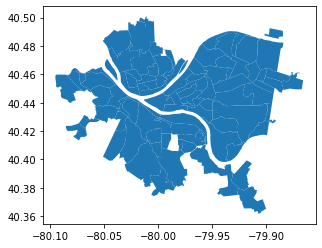

In [137]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [147]:
#  the merge
crime_map = neighborhoods.merge(weighted["Total/Pop"]
, how='outer', left_index=True, right_index=True)

# look at the head to confirm it merged correctly
crime_map[['Total/Pop','hood','geometry']].head()




,Total/Pop,hood,geometry
0,NaN,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,NaN,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,NaN,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,NaN,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,NaN,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<AxesSubplot:>

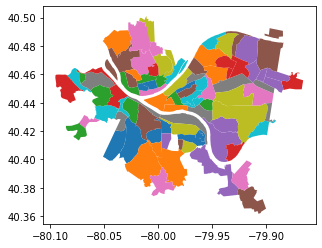

In [144]:
# draw a choropleth map using data from the column named "crime_map"
crime_map.plot(column='hood')

In [6]:
crime_map.plot(column='Total/Pop', # set the data to be used for coloring
               cmap='OrRd',              
               edgecolor="Gray",        # district outlines in Gray
               legend=True,              # legend
               legend_kwds={'label': "Crime Rate"}, # label the legend
               figsize=(12, 8),         #  size
               missing_kwds={"color": "Red"}

SyntaxError: unexpected EOF while parsing (<ipython-input-6-dcc4ba8a7055>, line 7)

Conclusoin: Best on the informaton givien the two best neighborhood to live in for crime would be squirrell hill north and mt oliver central northside. The worst is Chateau. 

Conclusion: 